# Column
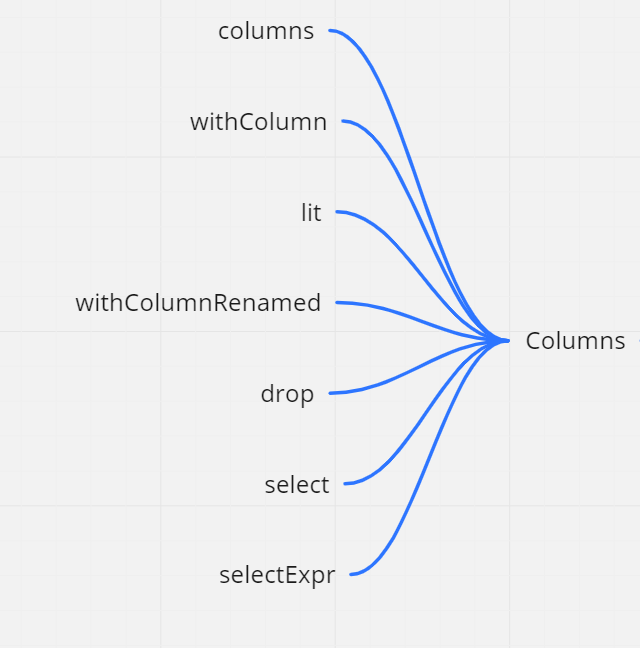

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

# Define the schema for a DataFrame
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("city", StringType(), True)
])


# Create a DataFrame using the schema
data = [("Alice", 25, "New York"), ("Bob", 30, "San Francisco"), ("Charlie", 35, "Chicago")]
df = spark.createDataFrame(data, schema)

# Show the DataFrame
df.show()

## [columns](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.columns.html#pyspark.sql.DataFrame.columns)

Returns all column names as a list.

In [ ]:
df.columns

## [withColumn](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.withColumn.html#pyspark.sql.DataFrame.withColumn)

withColumn(colName: str, col: pyspark.sql.column.Column) → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame by adding a column or replacing the existing column that has the same name.

In [ ]:
# Creating a new column called 'new_age'
df = df.withColumn('new_age', (F.col('age') + 5).cast('int'))
df.toPandas()

In [ ]:
# Replacing a existing new column called 'new_age' with new values
df = df.withColumn('new_age', df.new_age + 2)
df.toPandas()

## [lit](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.lit.html)

pyspark.sql.functions.lit(col: Any) → pyspark.sql.column.Column

Creates a Column of literal value.

In [ ]:
df = df.withColumn('constant', F.lit('TableA'))
df.toPandas()

## [withColumnRenamed](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.withColumnRenamed.html)

DataFrame.withColumnRenamed(existing: str, new: str) → pyspark.sql.dataframe.DataFrame

Returns a new DataFrame by renaming an existing column. This is a no-op if schema doesn’t contain the given column name.

In [ ]:
df = df.withColumnRenamed('new_age', 'new_age2')
df.toPandas()

In [ ]:
df = df.withColumnRenamed('new_age3', 'new_age4')
df.toPandas()

## [alias](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.alias.html)

Column.alias(*alias: str, **kwargs: Any) → pyspark.sql.column.Column

Returns this column aliased with a new name or names (in the case of expressions that return more than one column, such as explode).

In [ ]:
df = df.select(F.col('name').alias('FirstName')
                ,F.col('age')
                ,F.col('city')
              )

df.toPandas()

## [drop](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.drop.html)

DataFrame.drop(*cols: ColumnOrName) → DataFrame

Returns a new DataFrame that drops the specified column. This is a no-op if schema doesn’t contain the given column name(s).

In [ ]:
df = df.drop('city')
df.toPandas()

In [ ]:
df = df.drop('new_age99')
df.toPandas()

## [select](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.select.html)

DataFrame.select(*cols: ColumnOrName) → DataFrame

Projects a set of expressions and returns a new DataFrame.

In [ ]:
df = df.select('FirstName', 'age')

df.toPandas()

## [selectExpr](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.selectExpr.html)

DataFrame.selectExpr(*expr: Union[str, List[str]]) → pyspark.sql.dataframe.DataFrame

Projects a set of SQL expressions and returns a new DataFrame.

This is a variant of select() that accepts SQL expressions.

In [ ]:
df_select = df.selectExpr('FirstName as Name', 'age as Age', 'age*2 as DoubleAge')
df_select.toPandas()